# Create Animated GIFs, Optical Flow Diagrams, and Streamline Plot To Visualize Positional and Velocity Data from DeepLabCut CSV Files.



# Load Libraries 

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from IPython.display import Image
from scipy.interpolate import griddata

# Load your CSV data

In [3]:
# Load CSV data, using the second and third rows as the header
df = pd.read_csv(r"C:\Users\Farha\Downloads\Mouse 1 W_W 12_2_23DLC_600frames.csv", header=[1, 2])
print(df.columns)

MultiIndex([('bodyparts',     'coords'),
            (     'Head',          'x'),
            (     'Head',          'y'),
            (     'Head', 'likelihood'),
            (     'Nose',          'x'),
            (     'Nose',          'y'),
            (     'Nose', 'likelihood'),
            (  'LeftEar',          'x'),
            (  'LeftEar',          'y'),
            (  'LeftEar', 'likelihood'),
            ( 'RightEar',          'x'),
            ( 'RightEar',          'y'),
            ( 'RightEar', 'likelihood'),
            (   'Thorax',          'x'),
            (   'Thorax',          'y'),
            (   'Thorax', 'likelihood'),
            ( 'TailBase',          'x'),
            ( 'TailBase',          'y'),
            ( 'TailBase', 'likelihood')],
           )


# Create and Define Heads for body parts and X, Y , and Likelihood. 

In [4]:
# Create a dictionary to map body part names to coordinate columns
body_part_data = {}
# Get unique body parts from the first level of the MultiIndex (excluding 'bodyparts')
unique_body_parts = df.columns.get_level_values(0).unique().tolist()
unique_body_parts.remove('bodyparts')

for part in unique_body_parts:
    # Use the MultiIndex to access the data
    body_part_data[part] = {
        "x": df.loc[:, (part, 'x')].to_numpy(),
        "y": df.loc[:, (part, 'y')].to_numpy(),
        "likelihood": df.loc[:, (part, 'likelihood')].to_numpy()
    }

for part in body_part_data.keys():
    print(f"body parts: {part}")


body parts: Head
body parts: Nose
body parts: LeftEar
body parts: RightEar
body parts: Thorax
body parts: TailBase


# Visualization of the Average Movement of Two Body Parts

In [ ]:
# Function to calculate the average position of two body parts
def calculate_average_position(body_part_data, part1, part2):
    average_positions = {
        "x": (np.array(body_part_data[part1]["x"]) + np.array(body_part_data[part2]["x"])) / 2,
        "y": (np.array(body_part_data[part1]["y"]) + np.array(body_part_data[part2]["y"])) / 2
    }
    return average_positions

# Function to create and display a GIF from the average positions of two body parts
def create_position_gif(average_positions, gif_name, save_directory):
    filenames = []
    for t in range(len(average_positions["x"])):
        fig, ax = plt.subplots()
        ax.plot(average_positions["x"][:t+1], average_positions["y"][:t+1], 'bo-')
        ax.set_xlim([min(average_positions["x"]), max(average_positions["x"])])
        ax.set_ylim([min(average_positions["y"]), max(average_positions["y"])])
        ax.set_xlabel('Average X position')
        ax.set_ylabel('Average Y position')
        filename = os.path.join(save_directory, f'frame{t}.png')
        plt.savefig(filename)
        filenames.append(filename)
        plt.close()

    gif_path = os.path.join(save_directory, gif_name)
    with imageio.get_writer(gif_path, mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
            os.remove(filename)

    return Image(url=gif_path)

# Calculate the average position
part1, part2 = 'Thorax', 'Head'
average_positions = calculate_average_position(body_part_data, part1, part2)

# Set the directory where you want to save the GIF and frame images
save_directory = r"C:\Users\Farha\Downloads\gif video mouse"  # Replace with your desired path
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Set the name for your GIF file
gif_name = 'average_position_Head_Thorax.gif'  # Replace with your desired file name

# Call the function with the required parameters
create_position_gif(average_positions, gif_name, save_directory)


# Optical Flow Visualization of Average of Two Body Parts

In [ ]:
# Function to calculate the average velocity of two body parts
def calculate_average_velocity(body_part_data, part1, part2, frame_rate):
    average_velocities = {
        "x": (np.diff(body_part_data[part1]["x"]) + np.diff(body_part_data[part2]["x"])) / (2 * frame_rate),
        "y": (np.diff(body_part_data[part1]["y"]) + np.diff(body_part_data[part2]["y"])) / (2 * frame_rate)
    }
    return average_velocities

# Function to create and display a GIF from the average positions and velocities of two body parts
def create_optical_flow_gif(body_part_data, part1, part2, frame_rate, gif_name, save_directory):
    average_positions = calculate_average_position(body_part_data, part1, part2)
    average_velocities = calculate_average_velocity(body_part_data, part1, part2, frame_rate)
    filenames = []
    for t in range(len(average_positions["x"]) - 1):  # Subtract 1 because velocities are one less than positions
        fig, ax = plt.subplots()
        ax.quiver(average_positions["x"][t], average_positions["y"][t], average_velocities["x"][t], average_velocities["y"][t], angles='xy', scale_units='xy', scale=0.1, color='purple')
        ax.set_xlim([min(average_positions["x"]), max(average_positions["x"])])
        ax.set_ylim([min(average_positions["y"]), max(average_positions["y"])])
        ax.set_xlabel('X position')
        ax.set_ylabel('Y position')
        filename = os.path.join(save_directory, f'optical_flow_frame{t}.png')
        plt.savefig(filename)
        filenames.append(filename)
        plt.close()

    gif_path = os.path.join(save_directory, gif_name)
    with imageio.get_writer(gif_path, mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
            os.remove(filename)

    return gif_path

# Example usage:
frame_rate = 30  # Replace with your actual frame rate
part1, part2 = 'Nose', 'Head'  # Replace with your actual body parts
save_directory = r"C:\Users\Farha\Downloads\gif video mouse"  # Replace with your desired path
gif_name = 'Average_optical_flow_Nose_Head.gif'  # Replace with your desired file name

# Call the function with the required parameters
create_optical_flow_gif(body_part_data, part1, part2, frame_rate, gif_name, save_directory)


# Optical Flow Graphs of Body Parts

<IPython.core.display.Javascript object>


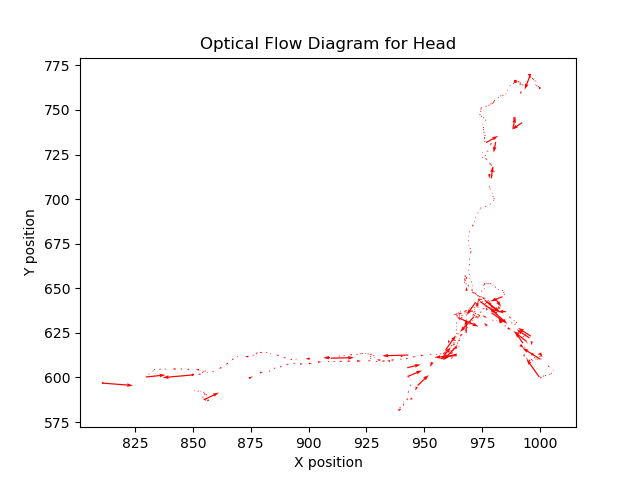

<IPython.core.display.Javascript object>


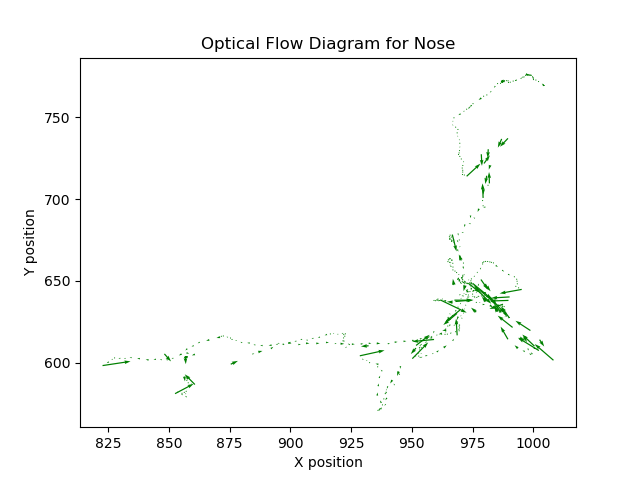

<IPython.core.display.Javascript object>


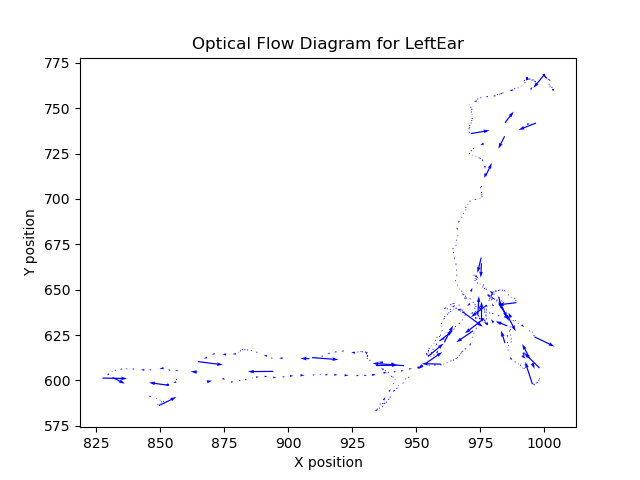

<IPython.core.display.Javascript object>


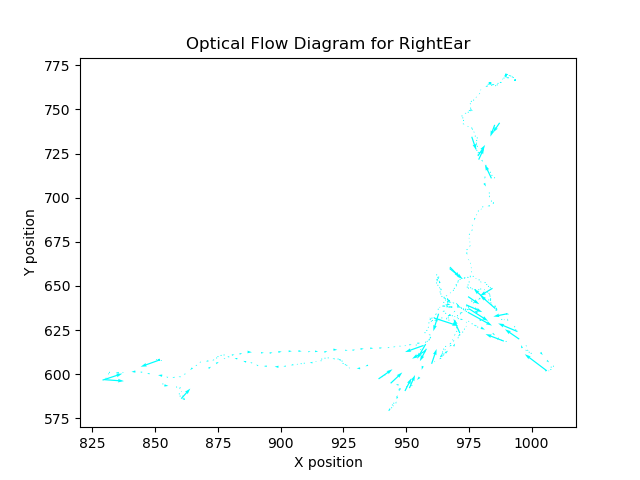

<IPython.core.display.Javascript object>


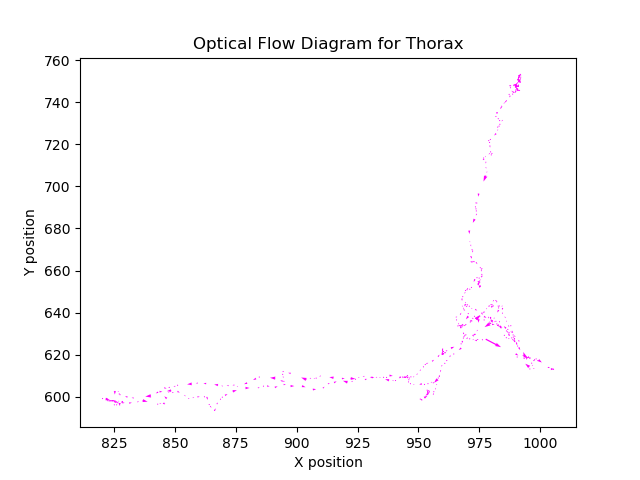

<IPython.core.display.Javascript object>


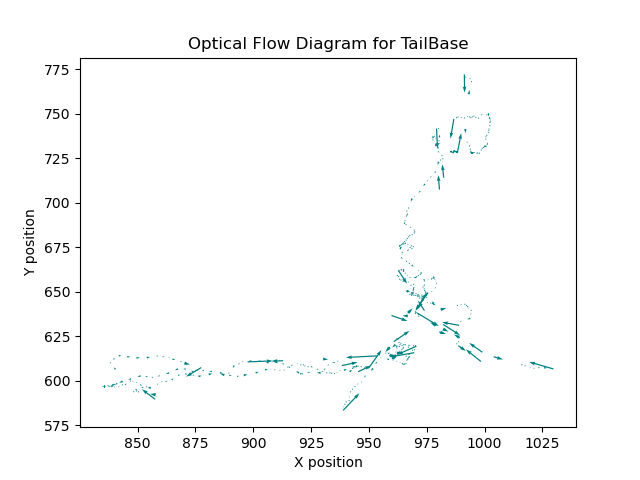

In [5]:
# Assuming body_part_data is a dictionary with keys as body parts
body_parts = list(body_part_data.keys())

# Parameter for frame rate
frame_rate = 30  # Replace with your actual frame rate

# Initialize the dictionary for velocities
velocities = {}

# Calculate velocities for each body part
for part in body_parts:
    # Ensure there are enough data points for velocity calculation
    if len(body_part_data[part]["x"]) > 1:
        # Calculate velocity as the difference in position over time
        velocities[part] = {
            "x": np.diff(body_part_data[part]["x"]) / frame_rate,
            "y": np.diff(body_part_data[part]["y"]) / frame_rate
        }

# Define a list of colors
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'teal', 'black']

# Plot optical flow diagrams for each body part
for idx, part in enumerate(body_parts):
    fig, ax = plt.subplots()
    ax.title.set_text(f'Optical Flow Diagram for {part}')
    
    # Get the original positions of the body part
    x_positions = body_part_data[part]["x"][:-1]  # Exclude the last point as velocity calculation reduces the array by 1
    y_positions = body_part_data[part]["y"][:-1]
    
    # Get the velocity components
    u = velocities[part]["x"]
    v = velocities[part]["y"]
    
    # Create the quiver plot with a unique color
    color = colors[idx % len(colors)]  # Cycle through the list of colors
    ax.quiver(x_positions, y_positions, u, v, color=color, angles='xy', scale_units='xy', scale=0.1) # scale value should be between 0 & 1
    
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    plt.show()

# Stream Plot to Visualize the Average Velocities of Two Body Part

<IPython.core.display.Javascript object>


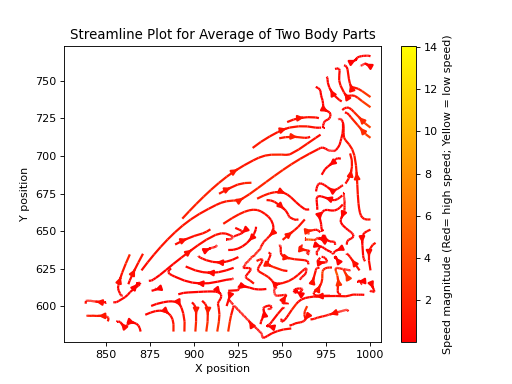

In [6]:
frame_rate = 30  # Replace with your actual frame rate
part1, part2 = 'Nose', 'Head'  # Replace with your actual body parts


def calculate_average_position(body_part_data, part1, part2):
    average_positions = {
        "x": (np.array(body_part_data[part1]["x"]) + np.array(body_part_data[part2]["x"])) / 2,
        "y": (np.array(body_part_data[part1]["y"]) + np.array(body_part_data[part2]["y"])) / 2
    }
    return average_positions

# Function to calculate the average velocity of two body parts
def calculate_average_velocity(body_part_data, part1, part2, frame_rate):
    average_velocities = {
        "x": (np.diff(body_part_data[part1]["x"]) + np.diff(body_part_data[part2]["x"])) / (2 * frame_rate),
        "y": (np.diff(body_part_data[part1]["y"]) + np.diff(body_part_data[part2]["y"])) / (2 * frame_rate)
    }
    return average_velocities
# Calculate the average position and velocity using the defined functions
average_positions = calculate_average_position(body_part_data, part1, part2)
average_velocities = calculate_average_velocity(body_part_data, part1, part2, frame_rate)

# Now you can use average_positions and average_velocities
x_positions = average_positions["x"][:-1]  # Use all but the last position to match velocity array size
y_positions = average_positions["y"][:-1]
u_velocities = average_velocities["x"]
v_velocities = average_velocities["y"]

# Create a grid to interpolate your data.
grid_x, grid_y = np.meshgrid(np.linspace(min(x_positions), max(x_positions), 100),
                             np.linspace(min(y_positions), max(y_positions), 100))

# Combine the position and velocity arrays into a single array for interpolation
points = np.transpose([x_positions, y_positions])
values = np.transpose([u_velocities, v_velocities])

# Interpolate the velocity vectors onto the grid
grid_values = griddata(points, values, (grid_x, grid_y), method='cubic')

# Split the interpolated values into two separate arrays for U and V components
grid_u = grid_values[..., 0]
grid_v = grid_values[..., 1]

# Create the streamline plot
fig, ax = plt.subplots()
speed = np.sqrt(grid_u**2 + grid_v**2)
strm = ax.streamplot(grid_x, grid_y, grid_u, grid_v, color=speed, linewidth=2, cmap='autumn')
ax.set_xlim([min(x_positions), max(x_positions)])
ax.set_ylim([min(y_positions), max(y_positions)])
ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_title('Streamline Plot for Average of Two Body Parts')
cbar = plt.colorbar(strm.lines)
cbar.set_label('Speed magnitude (Red= high speed; Yellow = low speed)')
cbar.ax.yaxis.label.set_color('black')  # Set the color of the label to black (or any color you prefer)
plt.show()